Theodoro Priosti de Almeida - RA: 10401614

Esse arquivo contém a análise exploratória do dataset. O dataset contém dados de empréstimos da empresa Lending Club, uma das maiores empresas de empréstimos americana.

O dataset contém dados de empréstimos de 2007 até 2018.

23-09-2025 - Theodoro
Limpeza dos dados e 

In [96]:
%pip install jupyter pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configuraçoes
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 5)
warnings.filterwarnings('ignore')


In [98]:
# Carregar dataset para analise
print("Carregando dataset")
df = pd.read_csv('data/lending_club.csv')

print(f"Linhas: {df.shape[0]}")

Carregando dataset
Linhas: 2260701


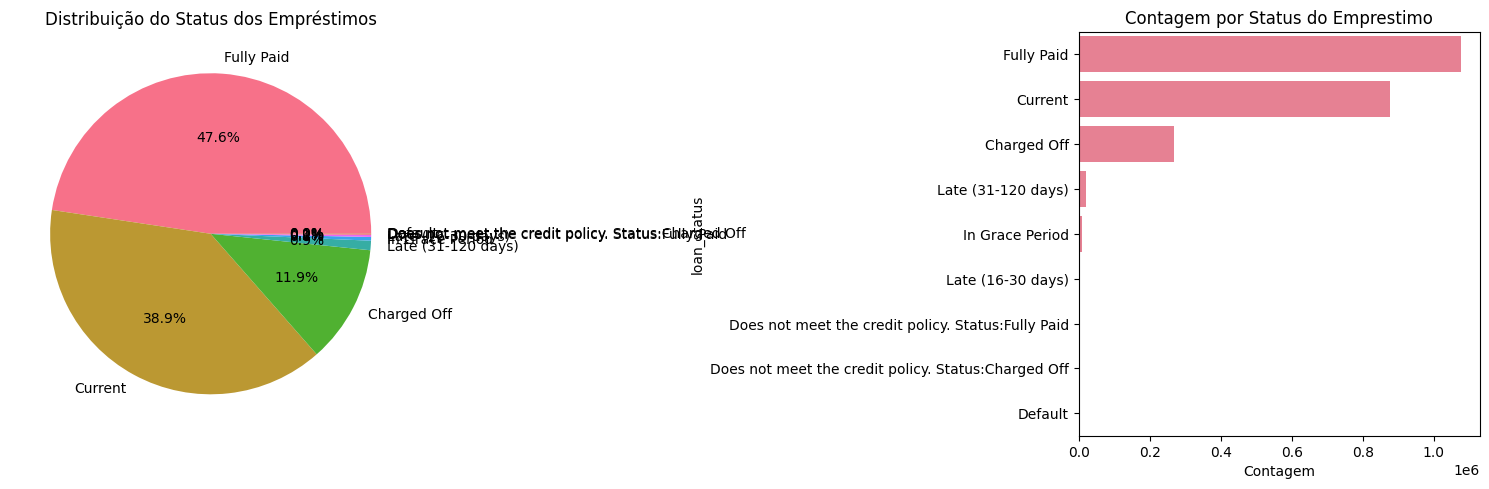

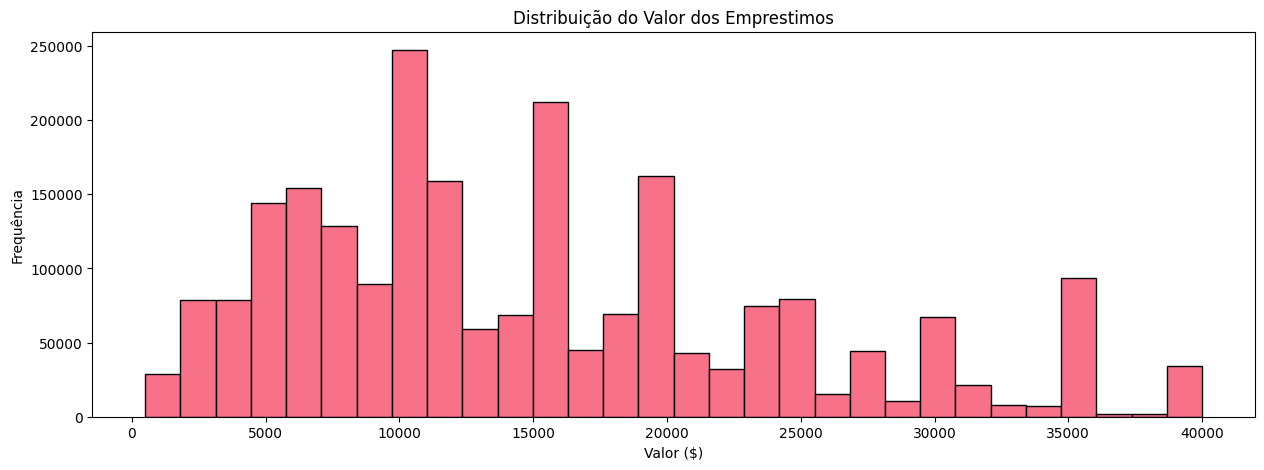

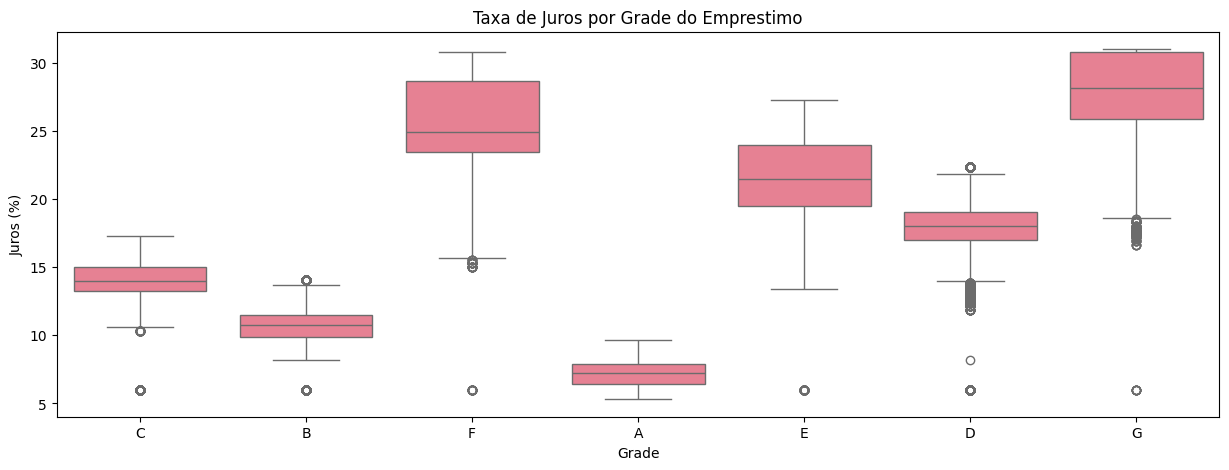

In [99]:
# Distribuição do status dos emprestimos
if 'loan_status' in df.columns:
    plt.subplot(1, 2, 1)
    loan_status_counts = df['loan_status'].value_counts()
    plt.pie(loan_status_counts.values, labels=loan_status_counts.index, autopct='%1.1f%%')
    plt.title('Distribuição do Status dos Empréstimos')

    plt.subplot(1, 2, 2)
    sns.countplot(data=df, y='loan_status', order=loan_status_counts.index)
    plt.title('Contagem por Status do Emprestimo')
    plt.xlabel('Contagem')

    plt.tight_layout()
    plt.show()

# Distribuição dos valores
if 'loan_amnt' in df.columns:
    plt.hist(df['loan_amnt'], bins=30, edgecolor='black')
    plt.title('Distribuição do Valor dos Emprestimos')
    plt.xlabel('Valor ($)')
    plt.ylabel('Frequência')
    plt.show()

# Taxa de juros vs Grade
if 'int_rate' in df.columns and 'grade' in df.columns:
    sns.boxplot(data=df, x='grade', y='int_rate')
    plt.title('Taxa de Juros por Grade do Emprestimo')
    plt.xlabel('Grade')
    plt.ylabel('Juros (%)')
    plt.show()


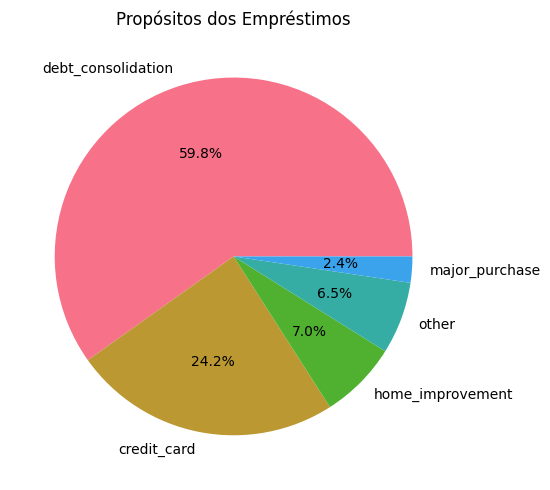

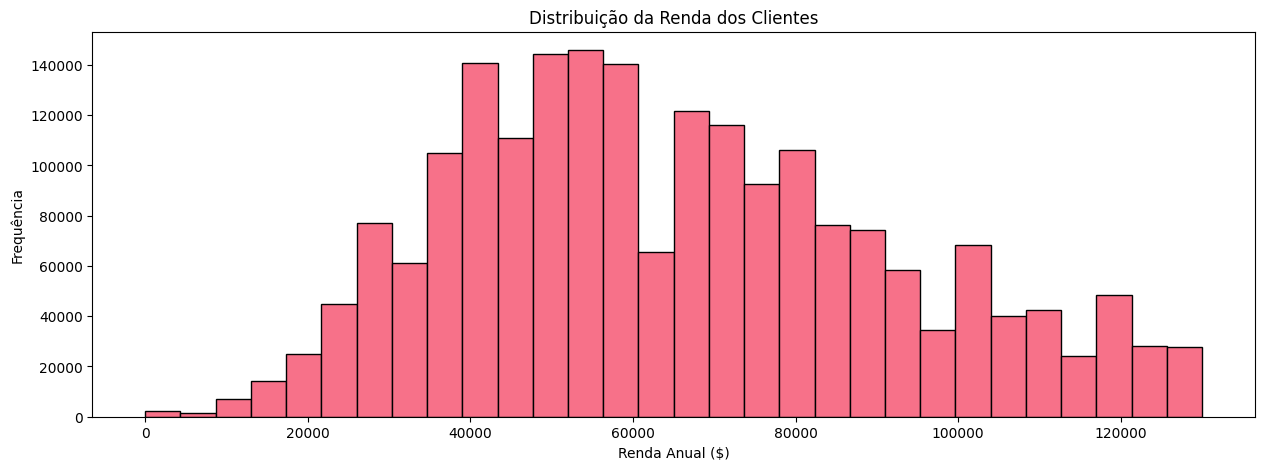

In [100]:
# propósito
if 'purpose' in df.columns:
    top_purpose = purpose_counts.head(5)
    plt.pie(top_purpose.values, labels=top_purpose.index, autopct='%1.1f%%')
    plt.title('Propósitos dos Empréstimos')

    plt.tight_layout()
    plt.show()

# Distribuição da renda anual
if 'annual_inc' in df.columns:
    plt.figure(figsize=(15, 5))

    annual_inc_filtered = df[df['annual_inc'] <= df['annual_inc'].quantile(0.9)]['annual_inc']

    plt.hist(annual_inc_filtered, bins=30, edgecolor='black')
    plt.title('Distribuição da Renda dos Clientes')
    plt.xlabel('Renda Anual ($)')
    plt.ylabel('Frequência')

    plt.show()


In [101]:
# limpeza dos dados
df_clean = df.copy()
initial_rows = df_clean.shape[0]

# valores ausentes por coluna
missing_threshold = 0.5
high_missing_cols = missing_df[missing_df['Porcentagem'] > (missing_threshold * 100)]['Coluna'].tolist()
if high_missing_cols:
    df_clean = df_clean.drop(columns=high_missing_cols)

# linhas com dados ausente
missing_threshold_rows = 0.3
df_clean['missing_count'] = df_clean.isnull().sum(axis=1)
df_clean['missing_percentage'] = df_clean['missing_count'] / df_clean.shape[1]

rows_to_remove = df_clean['missing_percentage'] > missing_threshold_rows
if rows_to_remove.sum() > 0:
    df_clean = df_clean[~rows_to_remove]

df_clean = df_clean.drop(columns=['missing_count', 'missing_percentage'])

# remover outliers
outlier_vars = ['loan_amnt', 'annual_inc', 'dti', 'revol_bal']
outlier_vars = [var for var in outlier_vars if var in df_clean.columns]

for var in outlier_vars:
    Q1 = df_clean[var].quantile(0.25)
    Q3 = df_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

print(f"Dataset limpo")


Dataset limpo


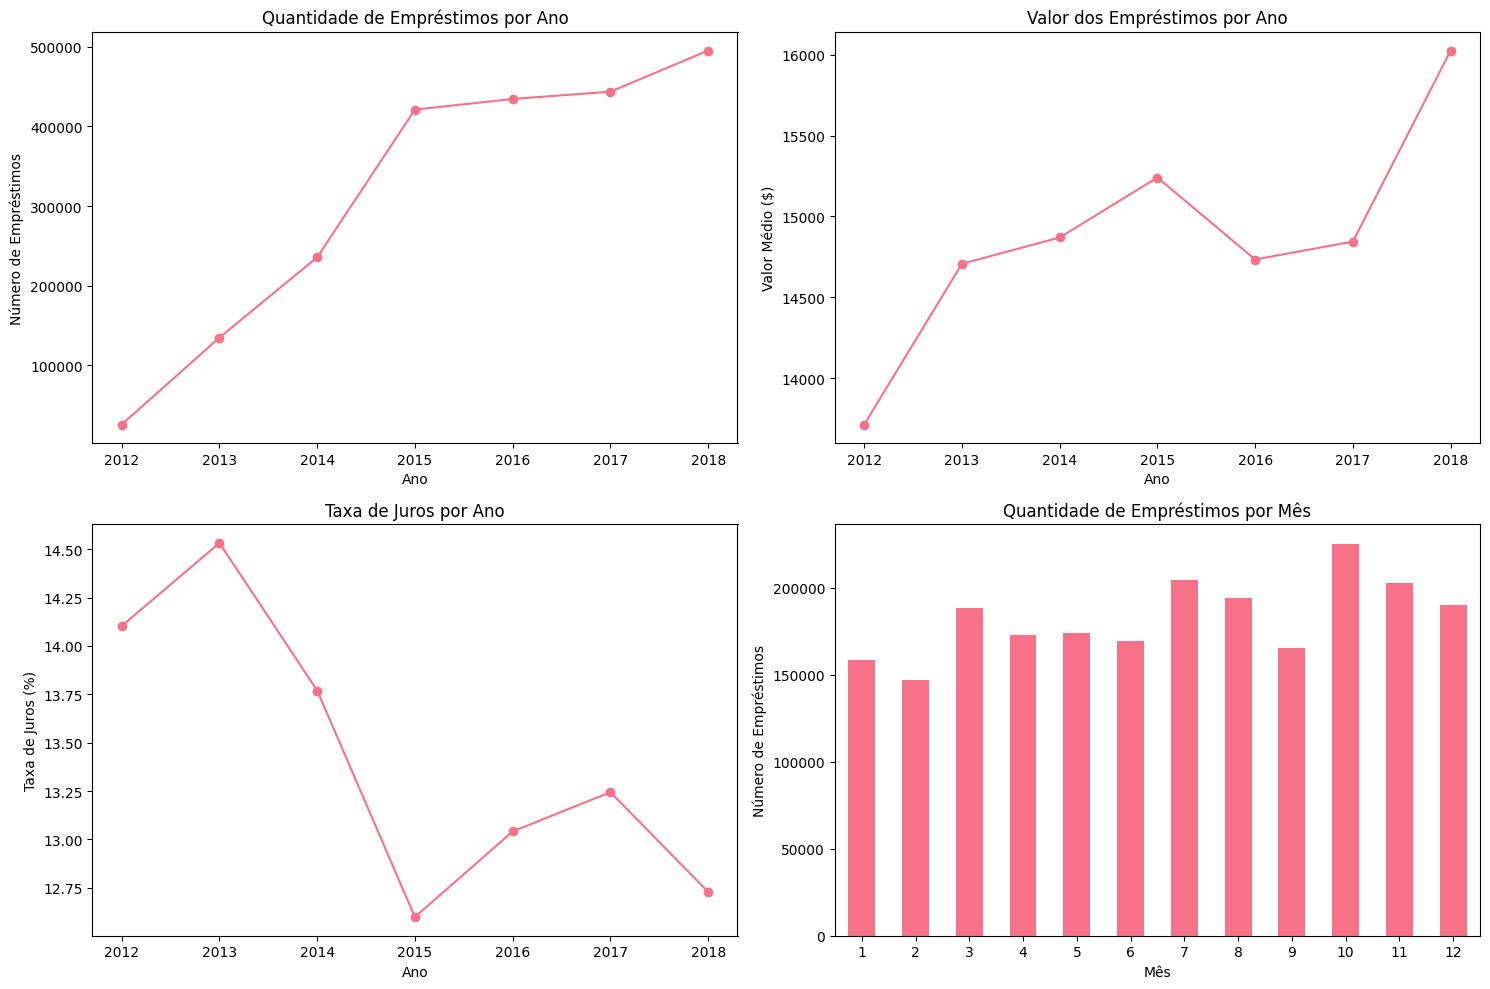

In [102]:
df_clean['issue_d'] = pd.to_datetime(df_clean['issue_d'])
plt.figure(figsize=(15, 10))

# empréstimos p/ ano
plt.subplot(2, 2, 1)
yearly_loans = df_clean.groupby(df_clean['issue_d'].dt.year).size()
yearly_loans.plot(kind='line', marker='o')
plt.title('Quantidade de Empréstimos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Empréstimos')

# valor médio p/ ano
plt.subplot(2, 2, 2)
yearly_avg_amount = df_clean.groupby(df_clean['issue_d'].dt.year)['loan_amnt'].mean()
yearly_avg_amount.plot(kind='line', marker='o')
plt.title('Valor dos Empréstimos por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor Médio ($)')

# taxa média p/ ano
plt.subplot(2, 2, 3)
yearly_avg_rate = df_clean.groupby(df_clean['issue_d'].dt.year)['int_rate'].mean()
yearly_avg_rate.plot(kind='line', marker='o')
plt.title('Taxa de Juros por Ano')
plt.xlabel('Ano')
plt.ylabel('Taxa de Juros (%)')

# distribuição mensal
plt.subplot(2, 2, 4)
monthly_loans = df_clean.groupby(df_clean['issue_d'].dt.month).size()
monthly_loans.plot(kind='bar')
plt.title('Quantidade de Empréstimos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Empréstimos')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
